## Import Dependencies

In [59]:
import os
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
import datetime as dt

## Hands on Sorting

### Task 1
Dari bagian kode ini:
```python
list_imgs = sorted(list_imgs, key=lambda x: int(x.split('/')[-1].split('.')[0]))
print(f"5 path pertama setelah diurutkan: {list_imgs[:5]}")
print(f"Total jumlah gambar: {len(list_imgs)}")
```

Kode ini bertujuan untuk mengurutkan (sorting) pada daftar gambar berdsarkan _key_ yang ditentukan dalam _lambda function_ seperti berikut.
- `x.split('/')[-1]`, berfungsi untuk memisahkan string menjadi beberapa item dalam list, dan akan di ambil item terakhir.
- `.split('.')[0]`, berfungsi untuk memisahkan item terakhir (berupa filename gambar) dan memisahkan filename dan extensi, lalu kita bisa mengambil filename sebagai key dalam proses konversi.
- `int()`, berfungsi untuk mengkonvensi string menjadi nilai integer.

Liat pada kasus ini, misalkan `list_imgs` berisi:
```python
list_imgs = ['path/to/image/1.jpg', 'path/to/image/10.jpg', 'path/to/image/2.jpg']
```
Proses untuk setiap item akan seperti berikut:
1. Split `/`:
`x.split('/')` akan memberikan `['path', 'to', 'image', '1.jpg']`
2. Split `.`:
`'1.jpg'.split('.')` akan menghasilkan daftar: ['1', 'jpg']
Mengambil elemen pertama dengan [0]: `1`
3. Konversi ke Integer:
`int('1')` akan menghasilkan: 1


## Dataset Nafas
| Nafas-ke | Second | Milisecond  |
|----------|--------|-------------|
|        1 |      7 |          89 |
|        2 |     14 |          46 |
|        3 |     19 |          67 |
|        4 |     25 |          20 |
|        5 |     30 |          10 |
|        6 |     35 |          90 |
|        7 |     40 |          77 |
|        8 |     46 |          15 |
|        9 |     50 |          86 |
|       10 |     56 |          93 |

## Precautionary Warnings
When working with huge of images that makes up a video, instead of Video in general, take care on the number of images fremes you work up with. It can be a memory problem if you take a lot of images.
> Warning!
> Mungkin komputer Anda akan kehabisan memori jika jumlah gambar yang dijadikan video terlalu banyak. Jika hal ini terjadi, Anda bisa mengurangi jumlah gambar yang dijadikan video atau menggunakan komputer dengan spesifikasi yang lebih tinggi.

Here's the part code to set the seq of images to video frames


In [60]:
# save_loc = os.path.join(os.getcwd(), 'data', 'toby-rgb.mp4')
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# height, width, layers = images_array[0].shape
# video = cv2.VideoWriter(save_loc, fourcc, 30, (width, height))

# for image in images_array:
#     video.write(image)

# video.release()

### Task 2

Jelaskan tentang bagian kode berikut:
```python
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
```

Dalam `OpenCV`, `FOURCC` (Four Character Code) adalah 4-byte code yang digunakan untuk encoding / decoding dari sebuah video. Normalnya, setiap video containers memiliki format codec-nya sendiri seperti berikut:
- XVID: MPEG-4 codec (often used for AVI files).
- MJPG: Motion JPEG codec.
- DIVX: DivX MPEG-4 codec.
- H264: H.264 codec (requires additional software support).
- MP4V: MPEG-4 codec for MP4 files.
- I420: Uncompressed YUV format.

Apa yang terjadi jika codec tidak sesuai dengan video container? Tidak ada kesalahan fatal, karena media player saat ini bisa mendukung berbagai macam codec, terlepas dari container format itu sendiri.


## Save frame from video into an images

To save a sequence of images from a video

In [61]:
## Set a Video Path and the Image Sequence path
video_path = os.path.join(os.getcwd(), 'attachment', 'sample-renamed.mp4') 
image_sequence_path = os.path.join(os.getcwd(), 'data', 'image_sequence')

## Create a folder if it does not exist
if not os.path.exists(image_sequence_path):
    os.makedirs(image_sequence_path)

## Setup a videoCapture object and frame count
videoCapture = cv2.VideoCapture(video_path)
frame_count = 0

## Read the video and save the frames for the first 100 frames
while frame_count < 100:
    ret, frame = videoCapture.read()
    if not ret:
        break
    cv2.imwrite(os.path.join(image_sequence_path, f'frame_{frame_count:03d}.png'), frame)
    frame_count += 1

## Release the videoCapture object
videoCapture.release()

### Task 3


In [ ]:
import cv2
import numpy as np

# Initialize video capture
original_video_path = os.path.join(os.getcwd(), 'attachment', 'sample-renamed.mp4')
videoCapture = cv2.VideoCapture(original_video_path)
fps = videoCapture.get(cv2.CAP_PROP_FPS)
print(f'Original FPS: {fps}')
frame_count = int(videoCapture.get(cv2.CAP_PROP_FRAME_COUNT))

# # Calculate new FPS
new_fps = fps / 3

# Initialize video writer
low_fps_video_path = os.path.join(os.getcwd(), 'data', 'video_low_fps.avi')

fourcc = cv2.VideoWriter_fourcc(*'xvid')
frame_size = (1280, 720)
output = cv2.VideoWriter(low_fps_video_path, fourcc, new_fps, frame_size)

frame_index = 0
while True:
    ret, frame = videoCapture.read()
    if not ret:
        break
    
    # Process every 3rd frame
    if frame_index % 3 == 0:
        # Resize to 1280x720
        resized_frame = cv2.resize(frame, frame_size)

        # Convert to grayscale
        gray_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY)
        
        # Convert back to RGB
        rgb_frame = cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2RGB)
        print(rgb_frame.shape)

        output.write(rgb_frame)

        
        # Calculate the position of the red dot
        # dot_position = (frame_index // 3) * (frame_size[0] // (frame_count // 3))
        # if dot_position >= frame_size[0]:
        #     dot_position = frame_size[0] - 1
        
        # Add red dot manually
        # rgb_frame[360, dot_position] = [255, 0, 0]  # Red dot in the center row
        
        # Write the frame to the output video
    
    frame_index += 1

print(f'Processed {frame_index} frames')

# Release resources
videoCapture.release()
output.release()
cv2.destroyAllWindows()



Original FPS: 30.0
Processed 1800 frames
New FPS: 0.0


In [ ]:
low_fps_video_path = os.path.join(os.getcwd(), 'data', 'video_low_fps.avi')

cap = cv2.VideoCapture(low_fps_video_path)
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

frames_array = np.array(frames)
cap.release()

print(f"Shape of frames_array: {frames_array.shape}")



Shape of frames_array: (600, 720, 1280, 3)


Length of a frame: (720, 1280, 3)


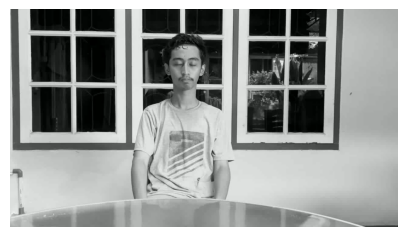

In [64]:
## Print length of a  frame
print(f"Length of a frame: {frames_array[0].shape}")

single_img = frames_array[0].copy()
plt.figure(figsize=(5, 5))
plt.imshow(single_img)
plt.axis('off')
plt.show()